<a href="https://colab.research.google.com/github/moridin04/DisasterResponseAssistant/blob/main/DisasterResponseAssistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Disaster Response Assistant with Predictive Analytics for Risk Management (NCR-Focused)**

Key features of the system include:
*   Data input and integration from reliable sources (e.g., PAGASA, PHIVOLCS, Project NOAH).
*  A visual map dashboard showing high-, medium-, and low-risk zones.
*   Safety recommendations and custom alerts based on predicted risk levels.
*   Exportable reports to support disaster response planning and awareness.
*   Deployment of a functional prototype for usability testing within a selected LGU or academic setting.



Process (Machine Learning Portion):

1. Load csv file of hazard risk data containing Earthquake-Induced Landslide, Flood, Ground Shaking, Liquefaction, Rain-Induced Landslide, Storm Surge, Tsunami
2. Classification of high, medium, low risk zones using K-Nearest Neighbors
3. Visualize using matplotlib for data analysis
4. Show which zones are safe
5. Be able to generate exportable reports on xlsx or pdf format

Utilities:

Scikit-learn, pandas, NumPy, matplotlib (for ML and data analysis), JDBC (for Java-DB integration)

K-Means Clustering


# **Prototype 1 (ML Section)**

**DATA INPUT and INTEGRATION**

In [ ]:
import pandas as pd
from google.colab import files

print("Upload your hazard risk CSV file...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Data Loaded Successfully")
display(df.head())

Upload your hazard risk CSV file...


Saving risk.csv to risk (1).csv
Data Loaded Successfully


,NCR,Earthquake-Induced Landslide,Flood,Ground Shaking,Liquefaction,Rain-Induced Landslide,Storm Surge,Tsunami
0,Caloocan,low,low,medium,low,low,low,high
1,Las Pinas,low,low,medium,low,low,low,high
2,Makati,low,low,high,medium,low,low,high
3,Malabon,low,medium,medium,high,low,low,high
4,Mandaluyong,low,low,medium,high,low,low,low


**PREDICTIVE RISK ANALYSIS**

In [ ]:
risk_map = {"low": 1, "medium": 2, "high": 3}

non_hazard_cols = [
    "NCR", "place", "cluster", "predicted_risk",
    "lat", "lon", "recommendation"
]

hazard_cols = [c for c in df.columns if c not in non_hazard_cols]

df_num = df.copy()
for col in hazard_cols:
    df_num[col] = df[col].map(risk_map)

df_num = df_num.drop(columns=non_hazard_cols, errors='ignore')

imputer = SimpleImputer(strategy="most_frequent")
df_num[hazard_cols] = imputer.fit_transform(df_num[hazard_cols])

scaler = StandardScaler()
X = scaler.fit_transform(df_num[hazard_cols])


In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

cluster_means = df_num.groupby(df["cluster"])[hazard_cols].mean().mean(axis=1).sort_values()
risk_levels = {c: label for c, label in zip(cluster_means.index, ["low", "medium", "high"])}
df["predicted_risk"] = df["cluster"].map(risk_levels)

display(df[["NCR", "predicted_risk"]])

,NCR,predicted_risk
0,Caloocan,low
1,Las Pinas,low
2,Makati,low
3,Malabon,low
4,Mandaluyong,low
5,Manila,high
6,Marikina,medium
7,Muntinlupa,low
8,Navotas,high
9,Paranaque,low


In [ ]:
def get_recommendation(risk):
  if risk == "low":
    return "Stay alert, monitor weather updates."
  elif risk == "medium":
    return "Prepare emergency kit and evacuation plan."
  else:
    return "Follow LGU evacuation orders immediately."


df["recommendation"] = df["predicted_risk"].apply(get_recommendation)


high_risk_places = df[df["predicted_risk"] == "high"]["NCR"].tolist()
if high_risk_places:
  print("ALERT: High risk zones detected!")
  print("High Risk Areas:", high_risk_places)
else:
  print("All zones are low to medium risk.")


display(df[["NCR", "predicted_risk", "recommendation"]])

ALERT: High risk zones detected!
High Risk Areas: ['Manila', 'Navotas', 'Valenzuela']


,NCR,predicted_risk,recommendation
0,Caloocan,low,"Stay alert, monitor weather updates."
1,Las Pinas,low,"Stay alert, monitor weather updates."
2,Makati,low,"Stay alert, monitor weather updates."
3,Malabon,low,"Stay alert, monitor weather updates."
4,Mandaluyong,low,"Stay alert, monitor weather updates."
5,Manila,high,Follow LGU evacuation orders immediately.
6,Marikina,medium,Prepare emergency kit and evacuation plan.
7,Muntinlupa,low,"Stay alert, monitor weather updates."
8,Navotas,high,Follow LGU evacuation orders immediately.
9,Paranaque,low,"Stay alert, monitor weather updates."


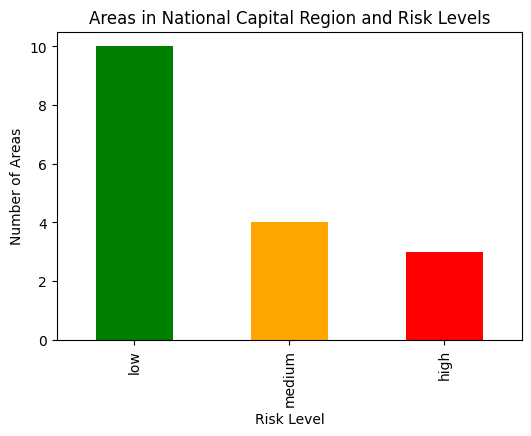

In [ ]:
import matplotlib.pyplot as plt

risk_counts = df["predicted_risk"].value_counts()

plt.figure(figsize=(6,4))
risk_counts.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Areas in National Capital Region and Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Number of Areas")
plt.show()


In [ ]:
summary_table = df.groupby("predicted_risk")["NCR"].apply(lambda x: ", ".join(x)).reset_index()
summary_table.columns = ["Risk Level", "Cities"]
display(summary_table)

,Risk Level,Cities
0,high,"Manila, Navotas, Valenzuela"
1,low,"Caloocan, Las Pinas, Makati, Malabon, Mandaluy..."
2,medium,"Marikina, Pasig, Pateros, Quezon City"


**USER INPUT and PRINT ANALYSIS**

In [ ]:
from reportlab.platypus import Spacer
user_input = input("Enter one or more cities/places in NCR (comma separated): ")
user_places = [p.strip().lower() for p in user_input.split(",")]

place_col_name = "NCR" if "NCR" in df.columns else "place"

mask = df[place_col_name].str.lower().apply(
    lambda x: any(place in x for place in user_places)
)
df_filtered = df[mask]

if df_filtered.empty:
    print(f"None of the entered places were found in the dataset.")
else:
    excel_file = "risk_report.xlsx"
    df_filtered.to_excel(excel_file, index=False)
    files.download(excel_file)
    print("Excel report generated for:", ", ".join(user_places))

    pdf_file = "risk_report.pdf"
    doc = SimpleDocTemplate(pdf_file)
    styles = getSampleStyleSheet()
    styles["Normal"].fontName = "Courier"
    styles["Title"].fontName = "Courier-Bold"
    story = []

    story.append(Paragraph("Disaster Risk Report in National Capital Region", styles["Title"]))
    story.append(Spacer(1, 12))

    table_data = [["NCR Location", "Predicted Future Risk", "Recommendation"]]
    for _, row in df_filtered.iterrows():
        place_col = row[place_col_name]
        table_data.append([place_col, row["predicted_risk"], row["recommendation"]])

    table = Table(table_data, repeatRows=1)
    table.setStyle(TableStyle([
        ("BACKGROUND", (0,0), (-1,0), colors.grey),
        ("TEXTCOLOR", (0,0), (-1,0), colors.whitesmoke),
        ("ALIGN", (0,0), (-1,-1), "CENTER"),
        ("FONTNAME", (0,0), (-1,0), "Courier"),
        ("BOTTOMPADDING", (0,0), (-1,0), 8),
        ("GRID", (0,0), (-1,-1), 0.5, colors.black),
    ]))
    story.append(table)

    doc.build(story)
    files.download(pdf_file)
    print("PDF report generated for:", ", ".join(user_places))


Enter one or more cities/places in NCR (comma separated): mandaluyong


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Excel report generated for: mandaluyong


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PDF report generated for: mandaluyong
